# Identifying Trains

## Intro
This is Sam's first attempt at fastai.

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

## Load Images

The Images are in .fastai/trains. There are two subfolders train and valid. Within each There are two subdirs of images: victora and jubilee.

In [19]:
path = Path("/home/sam/.fastai/data/trains"); path
victoriaPath = path / "train" / "victoria"; victoriaPath
jubileePath = path / "train" / "jubilee"; jubileePath

PosixPath('/home/sam/.fastai/data/trains/train/jubilee')

In [20]:
vnames = get_image_files(victoriaPath)
jnames = get_image_files(jubileePath)
vnames[:5]
jnames[:5]


[PosixPath('/home/sam/.fastai/data/trains/train/jubilee/8.jpeg'),
 PosixPath('/home/sam/.fastai/data/trains/train/jubilee/15.jpeg'),
 PosixPath('/home/sam/.fastai/data/trains/train/jubilee/14.jpeg'),
 PosixPath('/home/sam/.fastai/data/trains/train/jubilee/10.jpeg'),
 PosixPath('/home/sam/.fastai/data/trains/train/jubilee/2.jpeg')]

In [35]:
np.random.seed(42)
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, bs=16, size=224).normalize(imagenet_stats)

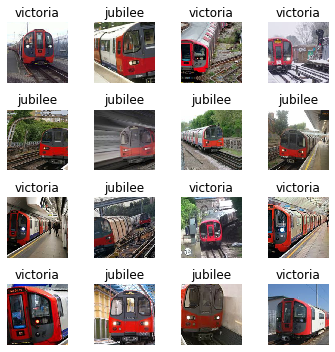

In [36]:
data.show_batch(rows=7, figsize=(5,5))

## Training

In [37]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [39]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.313037,0.247664,0.111111,00:00
1,0.192955,0.200262,0.222222,00:00
2,0.143985,0.173514,0.111111,00:00
3,0.110275,0.170624,0.111111,00:00
4,0.096685,0.168994,0.111111,00:00
5,0.095800,0.181381,0.111111,00:00


##Analysis

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

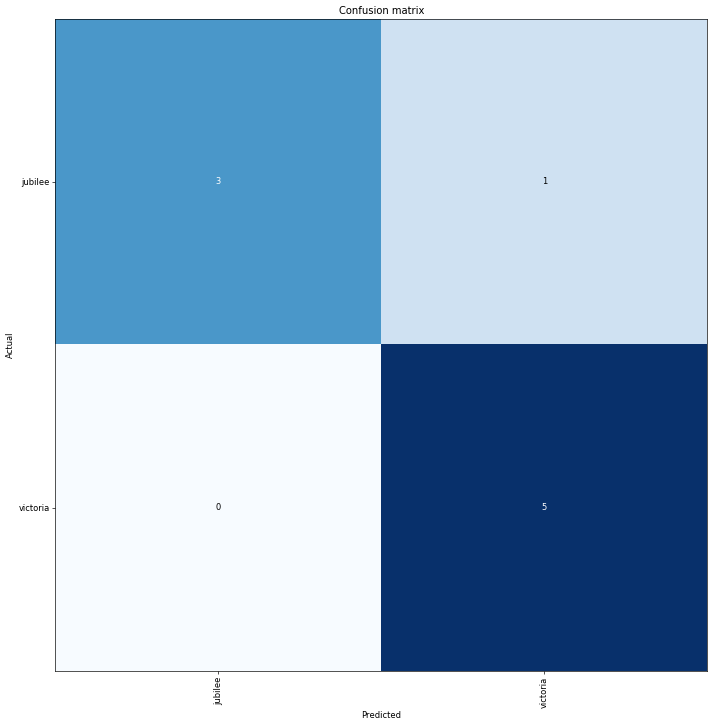

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [42]:
interp.most_confused(min_val=1)

[('jubilee', 'victoria', 1)]

## Learning Rate

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


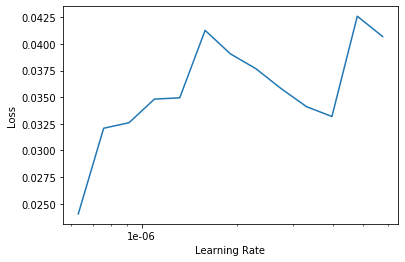

In [45]:
learn.recorder.plot()